In [1]:
pip install scikit-learn numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take first two features for visualization
y = iris.target  # Class labels

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Create SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [20]:
X.shape

(150, 2)

In [22]:
y.shape

(150,)

In [24]:
# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 80.00%


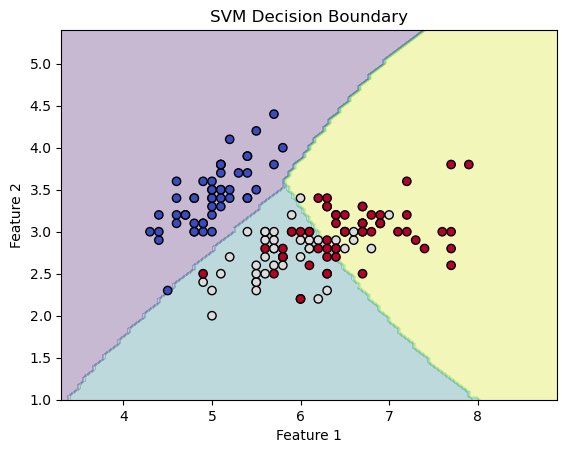

In [26]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(svm_model, X, y)
